### EDA Analysis

Here we did the Basic EDA Analysis on the dataset
Analysis of the Dataset :
1. Data consist of about 7000 data points
2. Male and Female are almost Equal in data
3. Electornic Check is most used Payment Method with Monthly Contracts being the most


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , roc_auc_score
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('data.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


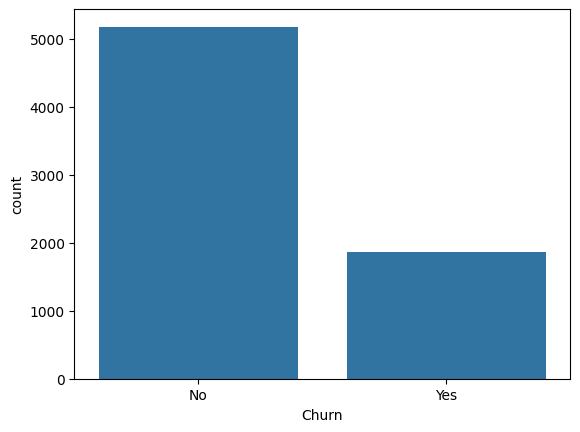

In [101]:
print(df['Contract'].value_counts())
plt.Figure(figsize=(25,25))
sns.countplot(x='Churn', data=df)
plt.show()

In [32]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Encoding the Categorical Data and Spliting the Dataset

In [19]:
le = LabelEncoder()

df_encoded = df.copy()

def encode_column(columns : list):
  for column in columns:
    df_encoded[f'{column}_encoded'] = le.fit_transform(df[column])
    df_encoded.drop(column , axis=1 , inplace=True)


encode_column(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'Contract' , 'PaperlessBilling' , 'PaymentMethod' , 'Churn'])

# df_dummy = pd.get_dummies(df.drop('customerID', axis=1) , columns=, drop_first=True , dtype=int)

# plt.Figure(figsize=(25,25))
# sns.heatmap(df_dummy.corr() , annot=True , cmap='coolwarm')
# plt.show()

df_encoded['TotalCharges'].replace(' ' , np.nan , inplace=True)
df_encoded['TotalCharges'] = pd.to_numeric(df_encoded['TotalCharges'])
df_encoded['TotalCharges'].fillna(df_encoded['TotalCharges'].mean())


df_encoded.drop('customerID', axis=1 , inplace=True)
df_encoded.fillna(df_encoded.median() , inplace=True)
df_encoded.info()



# Train Test Split 

X = df_encoded.drop('Churn_encoded' , axis=1)
y = df_encoded['Churn_encoded']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42 , shuffle=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SeniorCitizen             7043 non-null   int64  
 1   tenure                    7043 non-null   int64  
 2   MonthlyCharges            7043 non-null   float64
 3   TotalCharges              7043 non-null   float64
 4   gender_encoded            7043 non-null   int64  
 5   Partner_encoded           7043 non-null   int64  
 6   Dependents_encoded        7043 non-null   int64  
 7   PhoneService_encoded      7043 non-null   int64  
 8   MultipleLines_encoded     7043 non-null   int64  
 9   InternetService_encoded   7043 non-null   int64  
 10  OnlineSecurity_encoded    7043 non-null   int64  
 11  OnlineBackup_encoded      7043 non-null   int64  
 12  DeviceProtection_encoded  7043 non-null   int64  
 13  TechSupport_encoded       7043 non-null   int64  
 14  Streamin

/tmp/ipykernel_2188/2033154401.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['TotalCharges'].replace(' ' , np.nan , inplace=True)


Standardizing the data

In [9]:
scalar = StandardScaler()

df_standard = scalar.fit_transform(df_encoded)
df_standard = pd.DataFrame(df_standard , columns=df_encoded.columns)

df_standard.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,Churn_encoded
0,-0.439916,-1.277445,-1.160323,-0.994242,-1.009559,1.034530,-0.654012,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-0.601023
1,-0.439916,0.066327,-0.259629,-0.173244,0.990532,-0.966622,-0.654012,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.601023
2,-0.439916,-1.236724,-0.362660,-0.959674,0.990532,-0.966622,-0.654012,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,1.663829
3,-0.439916,0.514251,-0.746535,-0.194766,0.990532,-0.966622,-0.654012,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.601023
4,-0.439916,-1.236724,0.197365,-0.940470,-1.009559,-0.966622,-0.654012,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,1.663829


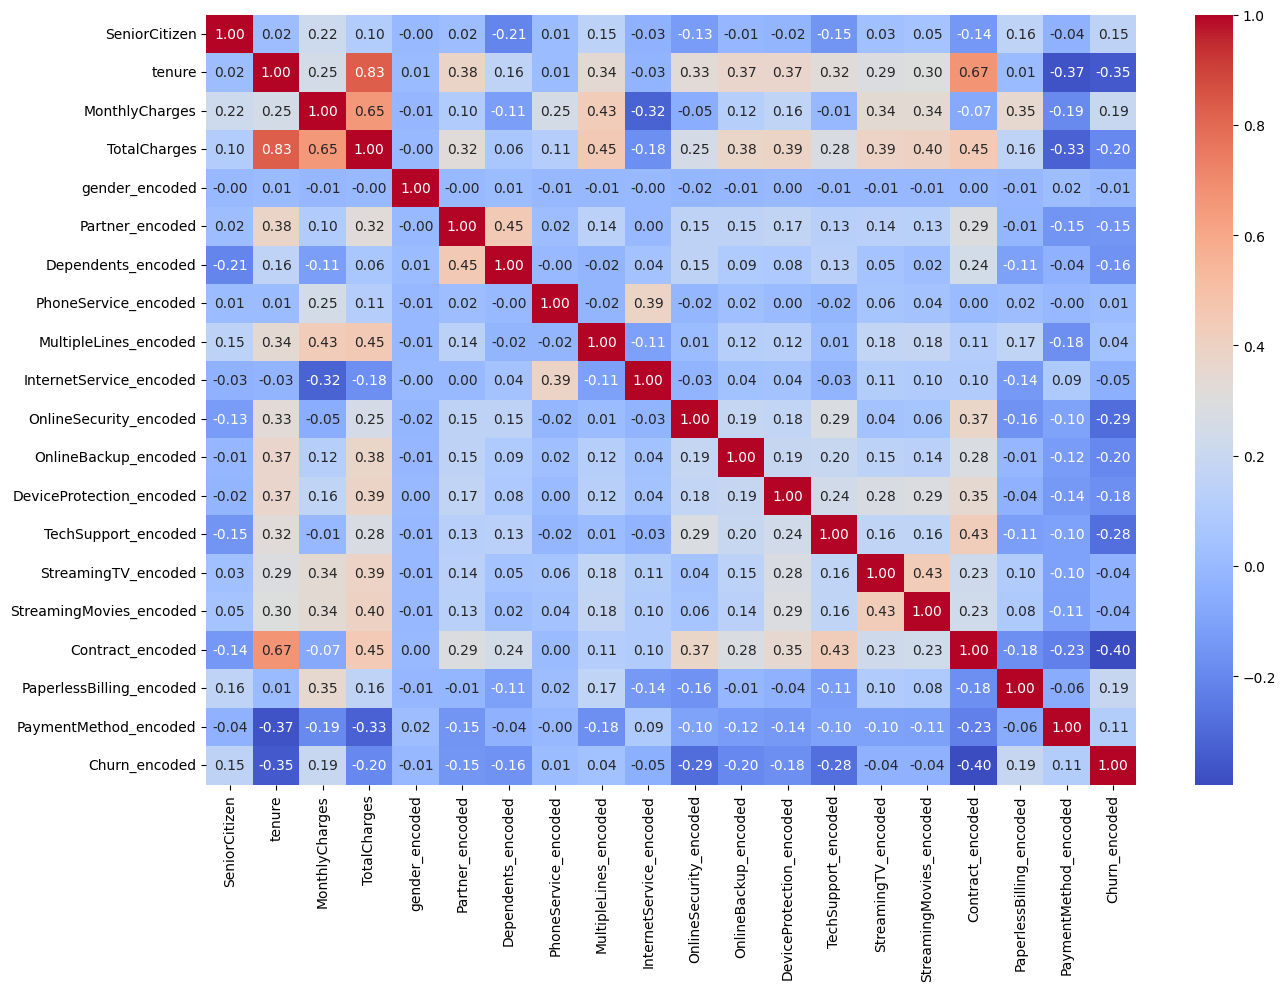

In [11]:

plt.figure(figsize=(15,10))
sns.heatmap(df_standard.corr() , annot=True , fmt='.2f' , cmap='coolwarm')
plt.show()

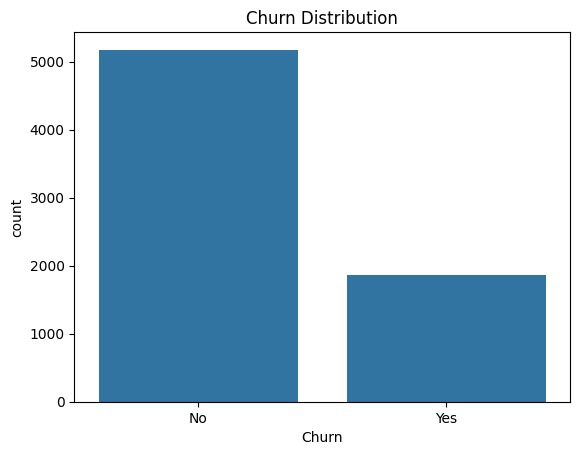

In [17]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [23]:
log_reg = LogisticRegression( max_iter=1000)

log_reg.fit(X_train , y_train)

y_pred = log_reg.predict(X_test)

print('Classification Report \n',classification_report(y_test , y_pred))
print('Confusion Report \n',confusion_matrix(y_test , y_pred))
print('Accuracy Report \n',accuracy_score(y_test , y_pred))
print('ROC Report \n',roc_auc_score(y_test , y_pred))

Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Confusion Report 
 [[934 102]
 [156 217]]
Accuracy Report 
 0.8168914123491838
ROC Report 
 0.7416569192708604


In [28]:
tree = DecisionTreeClassifier(max_depth=10 , random_state=42)

tree.fit(X_train , y_train)

y_pred = tree.predict(X_test)

print('Classification Report :\n',classification_report(y_test , y_pred))
print('Confusion Report :\n',confusion_matrix(y_test , y_pred))
print('Accuracy Report :\n',accuracy_score(y_test , y_pred))
print('ROC Report :\n',roc_auc_score(y_test , y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1036
           1       0.56      0.57      0.56       373

    accuracy                           0.77      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409

Confusion Report :
 [[873 163]
 [162 211]]
Accuracy Report :
 0.7693399574166075
ROC Report :
 0.7041738693883467
